# February 2021 Cablevision Mexico

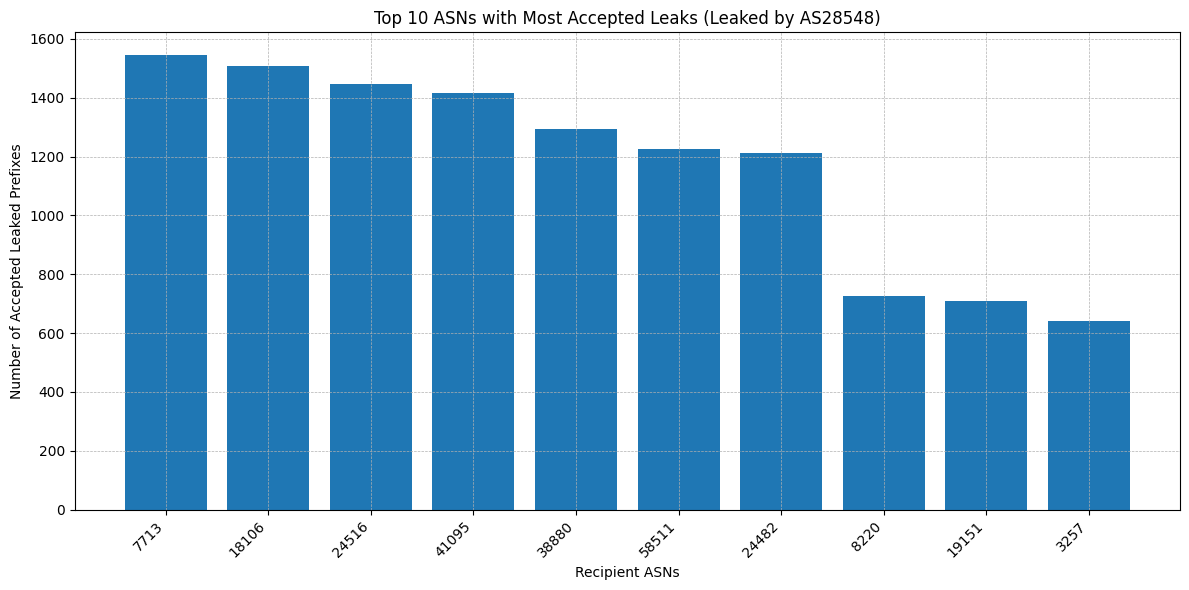

In [8]:
import pybgpstream
import matplotlib.pyplot as plt
from datetime import datetime
from collections import defaultdict

# Define the time window around the incident
start_time = "2021-02-11 00:00:00"
end_time = "2021-02-11 05:59:59"

# Target ASN and the ASN through which leaks propagated
leaking_asn = "28548"

# Initialize BGPStream with an expanded list of collectors
stream = pybgpstream.BGPStream(
    from_time=start_time,
    until_time=end_time,
    collectors=["route-views.sg", "route-views.eqix"],
    record_type="updates"
)

# Store counts of leaked prefixes and recipient ASNs
leaked_prefixes = defaultdict(set)

# Process BGP records
for rec in stream.records():
    for elem in rec:
        if elem.type == "A":
            as_path = elem.fields["as-path"].split()
            prefix = elem.fields["prefix"]
            if leaking_asn in as_path:
                # Record recipient ASN and the prefix
                recipient_asn = as_path[0]
                leaked_prefixes[recipient_asn].add(prefix)

# Count the number of unique prefixes accepted by each recipient ASN
prefix_count_per_asn = {asn: len(prefixes) for asn, prefixes in leaked_prefixes.items()}

# Sort ASNs by the number of accepted prefixes
sorted_asns = sorted(prefix_count_per_asn.items(), key=lambda x: x[1], reverse=True)[:10]  # Top 10 ASNs

# Extracting ASNs and their counts for plotting
asns, counts = zip(*sorted_asns)

# Visualizing the top 10 ASNs
plt.figure(figsize=(12, 6))
plt.bar(asns, counts)
plt.xlabel('Recipient ASNs')
plt.ylabel('Number of Accepted Leaked Prefixes')
plt.title(f'Top 10 ASNs with Most Accepted Leaks (Leaked by AS{leaking_asn})')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

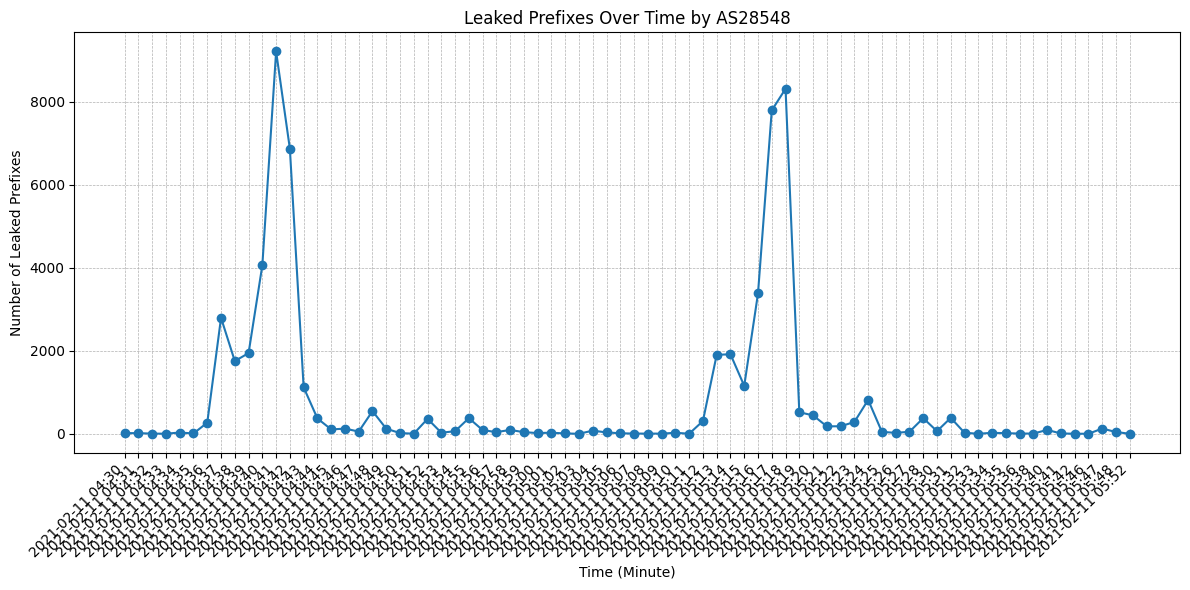

In [2]:
import pybgpstream
import matplotlib.pyplot as plt
from datetime import datetime
from collections import defaultdict

# Define the time window around the incident
start_time = "2021-02-11 04:30:00 UTC"
end_time = "2021-02-11 05:59:59 UTC"

# Target ASN that propagated the leaks
leaking_asn = "28548"

# Initialize BGPStream with an expanded list of collectors
stream = pybgpstream.BGPStream(
    from_time=start_time,
    until_time=end_time,
    collectors=["route-views.sg", "route-views.eqix"],
    record_type="updates"
)

# Store counts of leaked prefixes over time
leaked_prefixes_over_time = defaultdict(int)

# Process BGP records
for rec in stream.records():
    for elem in rec:
        if elem.type == "A":
            as_path = elem.fields["as-path"].split()
            prefix = elem.fields["prefix"]
            if leaking_asn in as_path:
                timestamp_minute = datetime.utcfromtimestamp(rec.time).strftime('%Y-%m-%d %H:%M')
                leaked_prefixes_over_time[timestamp_minute] += 1

# Visualizing the spike in leaked prefixes over time
timestamps = sorted(leaked_prefixes_over_time.keys())
counts = [leaked_prefixes_over_time[ts] for ts in timestamps]

plt.figure(figsize=(12, 6))
plt.plot(timestamps, counts, marker='o', linestyle='-')
plt.xlabel('Time (Minute)')
plt.ylabel('Number of Leaked Prefixes')
plt.title(f'Leaked Prefixes Over Time by AS{leaking_asn}')
plt.xticks(rotation=45, ha='right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Spike detected at 2021-02-11 04:35: 185245 leaked prefixes (Threshold: 110827.55555555556)
Spike detected at 2021-02-11 04:40: 693711 leaked prefixes (Threshold: 110827.55555555556)


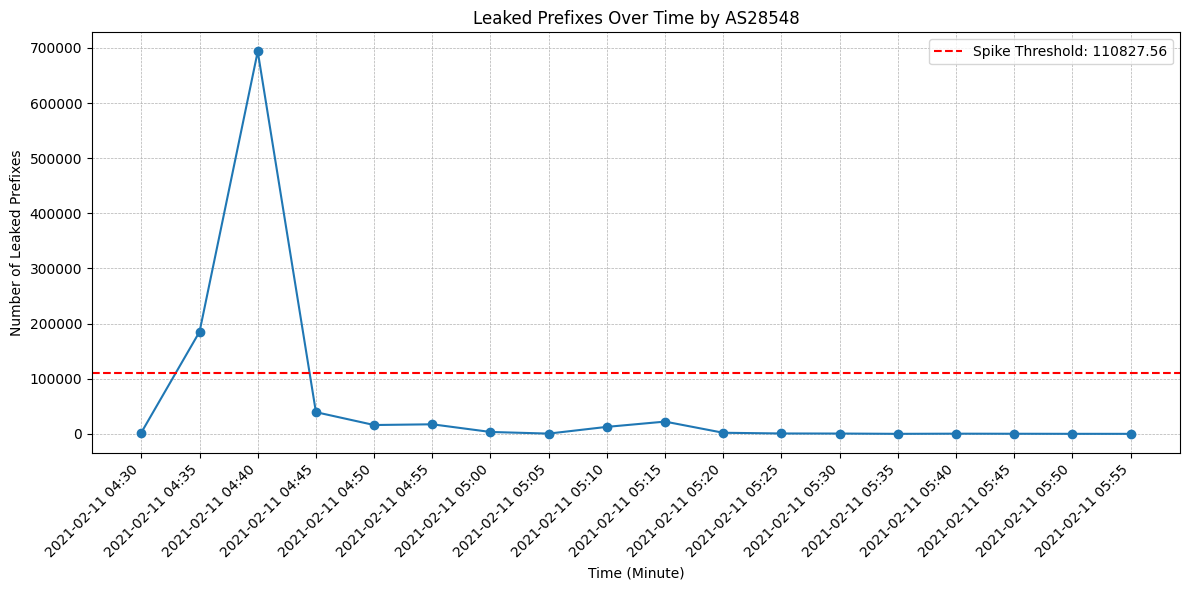

In [3]:
import pybgpstream
import matplotlib.pyplot as plt
from datetime import datetime
from collections import defaultdict

# Define the time window around the incident
start_time = "2021-02-11 04:30:00 UTC"
end_time = "2021-02-11 05:59:59 UTC"

# Target ASN that propagated the leaks
leaking_asn = "28548"

# Initialize BGPStream
stream = pybgpstream.BGPStream(
    from_time=start_time,
    until_time=end_time,
    record_type="updates"
)

# Store counts of leaked prefixes over time
leaked_prefixes_over_time = defaultdict(int)

# Process BGP records
for rec in stream.records():
    for elem in rec:
        if elem.type == "A":
            as_path = elem.fields["as-path"].split()
            prefix = elem.fields["prefix"]
            if leaking_asn in as_path:
                # Adjusting timestamp to 5-minute intervals
                timestamp = datetime.utcfromtimestamp(rec.time)
                timestamp_minute = timestamp.replace(minute=timestamp.minute - timestamp.minute % 5).strftime('%Y-%m-%d %H:%M')
                leaked_prefixes_over_time[timestamp_minute] += 1

# Calculate average count of leaked prefixes
average_leaks = sum(leaked_prefixes_over_time.values()) / len(leaked_prefixes_over_time)

# Spike detection threshold, e.g., 2 times the average
spike_threshold = 2 * average_leaks

# Visualizing the spike in leaked prefixes over time
timestamps = sorted(leaked_prefixes_over_time.keys())
counts = [leaked_prefixes_over_time[ts] for ts in timestamps]

plt.figure(figsize=(12, 6))
plt.plot(timestamps, counts, marker='o', linestyle='-')

# Check for spikes
for ts, count in leaked_prefixes_over_time.items():
    if count > spike_threshold:
        print(f"Spike detected at {ts}: {count} leaked prefixes (Threshold: {spike_threshold})")

plt.axhline(y=spike_threshold, color='r', linestyle='--', label=f'Spike Threshold: {spike_threshold:.2f}')
plt.xlabel('Time (Minute)')
plt.ylabel('Number of Leaked Prefixes')
plt.title(f'Leaked Prefixes Over Time by AS{leaking_asn}')
plt.xticks(rotation=45, ha='right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
import pybgpstream
from datetime import datetime
from collections import defaultdict

start_time = "2021-02-11 00:00:00 UTC"
end_time = "2021-02-11 05:59:59 UTC"

leaking_asn = "28548"

stream = pybgpstream.BGPStream(
    from_time=start_time,
    until_time=end_time,
    record_type="updates"
)

# Store counts of leaked prefixes over time
leaked_prefixes_over_time = defaultdict(int)

for rec in stream.records():
    for elem in rec:
        if elem.type == "A":
            as_path = elem.fields["as-path"].split()
            prefix = elem.fields["prefix"]
            if leaking_asn in as_path:
                # Adjusting timestamp to 5-minute intervals
                timestamp = datetime.utcfromtimestamp(rec.time)
                timestamp_minute = timestamp.replace(minute=timestamp.minute - timestamp.minute % 5).strftime('%Y-%m-%d %H:%M')
                leaked_prefixes_over_time[timestamp_minute] += 1

average_leaks = sum(leaked_prefixes_over_time.values()) / len(leaked_prefixes_over_time)

spike_threshold = 2 * average_leaks

# Detecting spikes and summarizing
current_spike_start = None
spike_count = 0
spike_peak = 0

for ts, count in sorted(leaked_prefixes_over_time.items()):
    if count > spike_threshold:
        if current_spike_start is None:
            current_spike_start = ts
        current_spike_end = ts
        spike_count += count
        spike_peak = max(spike_peak, count)
    else:
        if current_spike_start:
            print(f"Spike detected from {current_spike_start} to {current_spike_end}: the total of {spike_count} leaked prefixes, peaking at {spike_peak}")
            current_spike_start = None
            
if current_spike_start:
    print(f"Spike detected from {current_spike_start} to {current_spike_end}: {spike_count} leaked prefixes")

1701824245 HTTP ERROR: Failure when receiving data from the peer (56)
1701824247 HTTP ERROR: Failure when receiving data from the peer (56)
1701824250 HTTP ERROR: Failure when receiving data from the peer (56)
1701824250 HTTP ERROR: Failure when receiving data from the peer (56)
1701824543 HTTP ERROR: Failure when receiving data from the peer (56)
2023-12-06 10:02:23 410328: bs_transport_file.c:39: ERROR: Could not open http://data.ris.ripe.net/rrc11/2021.02/updates.20210211.0040.gz for reading
2023-12-06 10:02:23 410328: bgpstream_transport.c:97: ERROR: Could not open resource (http://data.ris.ripe.net/rrc11/2021.02/updates.20210211.0040.gz)
2023-12-06 10:02:23 410328: bgpstream_reader.c:169: WARNING: Could not open (http://data.ris.ripe.net/rrc11/2021.02/updates.20210211.0040.gz). Attempt 1 of 5
1701824543 HTTP ERROR: Failure when receiving data from the peer (56)
2023-12-06 10:02:23 410328: bs_transport_file.c:39: ERROR: Could not open http://data.ris.ripe.net/rrc03/2021.02/updates.

Spike detected from 2021-02-11 04:35 to 2021-02-11 04:45: the total of 918367 leaked prefixes, peaking at 918367


#  Telekom Malaysia (AS4788) caused significant network problems 

In [4]:
import pybgpstream
from collections import defaultdict

# Define the time window for the incident
start_time = "2015-06-12 08:40:00"
end_time = "2015-06-12 11:30:00"

# Initialize the BGPStream
stream = pybgpstream.BGPStream(
    from_time=start_time,
    until_time=end_time,
    collectors=["route-views2"],
    record_type="updates"
)

# Dictionary to store the count of BGP announcements per prefix
prefix_announcements = defaultdict(int)

# Process BGP records
for rec in stream.records():
    for elem in rec:
        if elem.type == "A":  # BGP announcements
            prefix = elem.fields["prefix"]
            prefix_announcements[prefix] += 1

# Find the prefix with the most announcements
most_announced_prefix = max(prefix_announcements, key=prefix_announcements.get)
most_announcements_count = prefix_announcements[most_announced_prefix]

# Print the results
print(f"The prefix announced the most during the incident was {most_announced_prefix} with {most_announcements_count} announcements.")


The prefix announced the most during the incident was 199.204.107.0/24 with 43048 announcements.


# April 2021: Large BGP routing leak out of India - Can't find the records

In [ ]:
import pybgpstream
import matplotlib.pyplot as plt
from datetime import datetime
from collections import defaultdict

# Define the time window around the incident
start_time = "2021-04-16 13:00:00 UTC"
end_time = "2021-04-16 15:59:59 UTC"

# AS55410 (Vodafone Idea Ltd.)
hijacking_asn = "55410"

# Initialize BGPStream with collectors that have good visibility in India
stream = pybgpstream.BGPStream(
    from_time=start_time,
    until_time=end_time,
    collectors=["rrc00", "rrc06"],
    record_type="updates"
)

# Store unique prefixes announced by AS55410
prefix_announcements = defaultdict(set)

# Process BGP records
for rec in stream.records():
    for elem in rec:
        if elem.type == "A":
            as_path = elem.fields["as-path"].split()
            prefix = elem.fields["prefix"]
            # Check if AS55410 is the originator of the prefix
            if as_path[0] == hijacking_asn:
                timestamp_minute = datetime.utcfromtimestamp(rec.time).strftime('%Y-%m-%d %H:%M')
                prefix_announcements[timestamp_minute].add(prefix)

# Count the number of unique prefixes announced per minute
prefix_count_per_minute = {minute: len(prefixes) for minute, prefixes in prefix_announcements.items()}

# Visualizing the spikes in prefix announcements over time
timestamps = sorted(prefix_count_per_minute.keys())
counts = [prefix_count_per_minute[ts] for ts in timestamps]

plt.figure(figsize=(12, 6))
plt.plot(timestamps, counts, marker='o', linestyle='-')
plt.xlabel('Time (Minute)')
plt.ylabel('Number of Unique Prefixes Announced')
plt.title('Spikes in Prefix Announcements by AS55410')
plt.xticks(rotation=45, ha='right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()